In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
#import dateutil
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# this code written by Paul AG

nyc_crime_sqft_rent_by_boro=pd.read_csv("NYC_CRIME_PRICE_SQFT_RENTAL_BY_BORO.csv")

boro=['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
# Kings is synomous with Brooklyn (same land mass)
county=['New York', 'Bronx', 'Kings', 'Queens', 'Richmond']


In [2]:
# Notes
# [item[0:4] for item in df.iloc[0::12]["Date"].values]
# ax = df.plot.line()
# plt.xticks(df.iloc[0::12,:]["Date"].keys(),[item[0:4] for item in df.iloc[1::12,:]["Date"].values],rotation=90)

In [3]:
nyc_crime_sqft_rent_by_boro.columns

Index(['Date', 'MANHATTAN_Crime_Cnt', 'BROOKLYN_Crime_Cnt', 'QUEENS_Crime_Cnt',
       'BRONX_Crime_Cnt', 'STATEN_ISLAND_Crime_Cnt',
       'Manhattan price per sqft', 'Brooklyn price per sqft',
       'Bronx price per sqft', 'Queens price per sqft',
       'Staten Island price per sqft', 'Manhattan rental price',
       'Brooklyn rental price', 'Bronx rental price', 'Queens rental price',
       'Staten Island rental price'],
      dtype='object')

In [4]:
manhattan_crime_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','MANHATTAN_Crime_Cnt'])

In [5]:
manhattan_price_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','Manhattan price per sqft'])

In [6]:
manhattan_rent_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','Manhattan rental price'])

In [7]:
manhattan_crime_df.head()

,Date,MANHATTAN_Crime_Cnt
0,2011-12,9735
1,2012-01,9784
2,2012-02,9181
3,2012-03,10389
4,2012-04,9964


In [8]:
manhattan_crime_df=manhattan_crime_df[manhattan_crime_df['Date']>'2011-12']

In [9]:
#yr=[item[0:4] for item in manhattan_crime_df.iloc[0::12]["Date"].values]

In [10]:
yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)

In [11]:
'''yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)
df=manhattan_crime_df.join(yr_df)
df1=df.rename(columns={0:'YR',1:'M'})
df2=df1.groupby(['YR']).mean()
df2=df2.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt (Mean)'})'''

"yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)\ndf=manhattan_crime_df.join(yr_df)\ndf1=df.rename(columns={0:'YR',1:'M'})\ndf2=df1.groupby(['YR']).mean()\ndf2=df2.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt (Mean)'})"

In [12]:
yr_df.head()

,0,1
1,2012,01
2,2012,02
3,2012,03
4,2012,04
5,2012,05


In [13]:
df=manhattan_crime_df.join(yr_df)

In [14]:
df1=df.rename(columns={0:'YR',1:'M'})

In [15]:
df2=df1.groupby(['YR']).sum()

In [16]:
df2=df2.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt'})

In [17]:
crime_df=df2

In [18]:
#crime_df3.head()

In [19]:
manhattan_price_df.head()

,Date,Manhattan price per sqft
0,2011-12,1000.96
1,2012-01,1005.04
2,2012-02,1008.44
3,2012-03,1011.48
4,2012-04,1015.52


In [20]:
manhattan_price_df=manhattan_price_df[manhattan_price_df['Date']>'2011-12']

In [21]:
yr_df=manhattan_price_df['Date'].str.split('-', expand=True)
price_df=manhattan_price_df.join(yr_df)
price_df1=price_df.rename(columns={0:'YR',1:'M'})
price_df2=price_df1.groupby(['YR']).mean()
price_df2=price_df2.rename(columns={'Manhattan price per sqft':'Manhattan Median Price SQFT (Mean)'})

In [22]:
manhattan_rent_df=manhattan_rent_df[manhattan_rent_df['Date']>'2011-12']

In [23]:
yr_df=manhattan_rent_df['Date'].str.split('-', expand=True)
rent_df=manhattan_rent_df.join(yr_df)
rent_df1=rent_df.rename(columns={0:'YR',1:'M'})
rent_df2=rent_df1.groupby(['YR']).mean()
rent_df2=rent_df2.rename(columns={'Manhattan rental price':'Manhattan Median Rental Price (Mean)'})

In [24]:
#rent_df3=rent_df2[rent_df2['YR']>'2011']

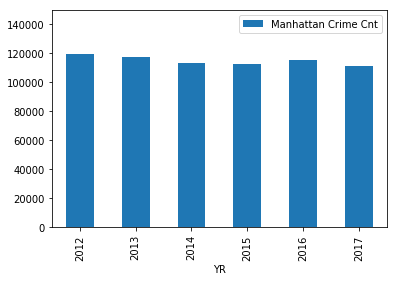

In [25]:
crime_df.plot.bar(ylim=(0,150000))

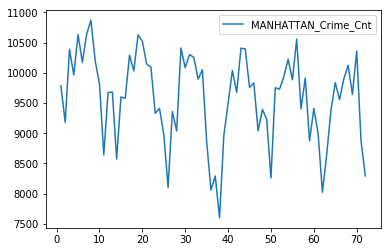

In [26]:
# by month and year
manhattan_crime_df.plot.line()

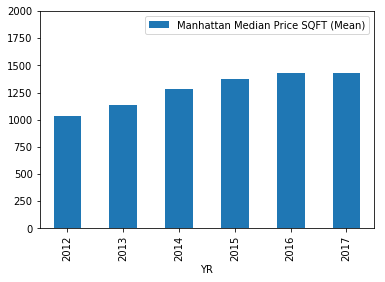

In [27]:
price_df2.plot.bar(ylim=(0,2000))

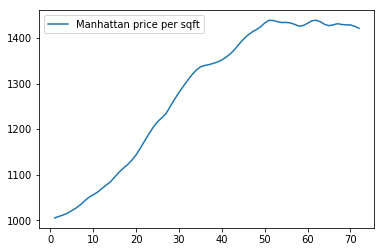

In [28]:
# by month and year
manhattan_price_df.plot.line()

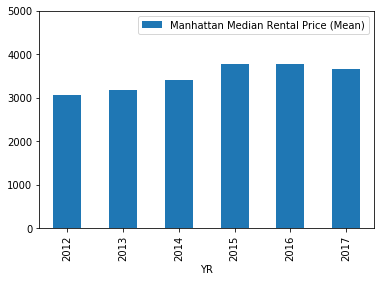

In [29]:
rent_df2.plot.bar(ylim=(0,5000))

([<matplotlib.axis.XTick at 0x1f7e432b518>,
 <a list of 6 Text xticklabel objects>)

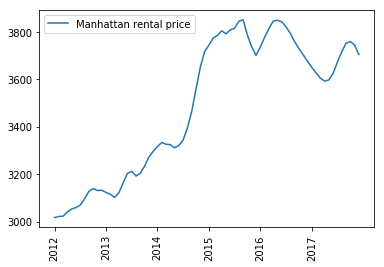

In [30]:
# by month and year
#manhattan_rent_df.plot.line()
ax = manhattan_rent_df.plot.line()
plt.xticks(manhattan_rent_df.iloc[0::12,:]["Date"].keys(),[item[0:4] for item in manhattan_rent_df.iloc[1::12,:]["Date"].values],
           rotation=90)

In [31]:
df.to_csv("\\Users\\Paul-DS\\Downloads\\Manhattan_Crime_Prices_Sqft_Rents_by_Boro.csv")

In [32]:
rent_df2

,Manhattan Median Rental Price (Mean)
YR,
2012,3075.647436
2013,3186.294872
2014,3421.733974
2015,3786.842949
2016,3778.961538
2017,3670.596154


In [33]:
price_5YR_diff=price_df2.diff()


In [34]:
price_df2

,Manhattan Median Price SQFT (Mean)
YR,
2012,1033.476667
2013,1133.230000
2014,1283.083333
2015,1375.263333
2016,1432.233333
2017,1430.273333


In [35]:
rent_5YR_diff=rent_df2.diff()
rent_5YR_total=rent_5YR_diff.sum()
manhattan_rent_5YR_change=rent_5YR_total/rent_df2.min()*100

In [36]:
manhattan_rent_5YR_change

Manhattan Median Rental Price (Mean)    19.343853
dtype: float64

In [87]:
rent_df=pd.DataFrame(manhattan_rent_5YR_change)

In [37]:
price_5YR_diff

,Manhattan Median Price SQFT (Mean)
YR,
2012,NaN
2013,99.753333
2014,149.853333
2015,92.180000
2016,56.970000
2017,-1.960000


In [38]:
price_5YR_total=price_5YR_diff.sum()

In [39]:
manhattan_price_5YR_change=price_5YR_total/price_df2.min()*100

In [40]:
manhattan_price_5YR_change

Manhattan Median Price SQFT (Mean)    38.394352
dtype: float64

In [86]:
price_df=pd.DataFrame(manhattan_rent_5YR_change)

In [41]:
crime_5YR_total=crime_df.sum()

In [42]:
crime_5YR_diff=crime_df.diff() 

In [43]:
crime_5YR_total_diff=crime_df.diff().sum()

In [44]:
crime_5YR_change=crime_5YR_total_diff/crime_5YR_total*100

In [90]:
crime=tuple(crime_5YR_change)

In [82]:
crime_df=pd.DataFrame(crime_5YR_change)

In [83]:
crime_df

,0
Manhattan Crime Cnt,-1.202697


In [101]:
df=pd.DataFrame({'Manhattan Crime 5yrs Change (count %)':crime,
                 'Manhattan RE per SQFT Price 5yrs Increase (mean %)':tuple(manhattan_price_5YR_change),
                 'Manhattan Rent 5yrs Increase (mean %)':tuple(manhattan_rent_5YR_change)})

In [102]:
df

,Manhattan Crime 5yrs Change (count %),Manhattan RE per SQFT Price 5yrs Increase (mean %),Manhattan Rent 5yrs Increase (mean %)
0,-1.202697,38.394352,19.343853
